In [1]:
import numpy as np
import os
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
sns.set_palette('plasma')

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer


<hr style="border:2px solid">

# Brain stroke prediction (Classification)

<hr style="border:2px solid">

## Contents
1. Introduction
2. Limitations
3. Terminology
4. Scaling
5. Balancing
6. Notes
7. Exploratory Data analysis(EDA)
8. Preprocessing
9. EDA - 2
10. Training 
11. K- nearest neaighbour(KNN)
12. Decision Trees
13. Random Forest
14. Support vector machine(SVM)
15. Model selection
16. Conclusions and Next steps 
17. References
18. Predicting unseen Data

## Introduction
<hr style="border-top:1px dashed">
Strokes are a significant cause of morbidity and mortality worldwide. According to the World Health Organization (WHO), strokes are the second leading cause of death and the third leading cause of disability worldwide([Health, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4940635/)). In the United States, stroke affects more than 795,000 people annually and is a leading cause of long-term disability. Timely and accurate diagnosis of stroke is crucial for effective treatment and management of the condition. However, misdiagnosis of stroke can have serious consequences.<br>

Misdiagnosis can occur when a patient is either incorrectly diagnosed as having a stroke or is not diagnosed with a stroke when they are experiencing one. Misdiagnosis can result in unnecessary treatments, additional healthcare costs, and undue stress for both the patient and their family. In contrast, failing to diagnose a stroke can lead to permanent brain damage, disability, or even death. Thus, the development of accurate and reliable methods for early diagnosis of stroke is essential.<br>

This report focuses on the development and evaluation of machine learning models to predict the likelihood of stroke in individuals. We explore various machine learning algorithms, including logistic regression, decision trees, and random forests, to predict the likelihood of stroke. We evaluate the performance of these models in terms of accuracy, sensitivity, specificity, and area under the curve (AUC). The aim of this report is to provide insight into the effectiveness of machine learning models for stroke prediction and their potential to improve early diagnosis and management of this critical condition.<br>

<hr style="border:2px solid">

## Limitiations
<hr style="border-top:1px dashed">

- Lack of data for individuals having strokes.
- Disadvantages relating to all accuracy scores, cannot know 'truly' how a model performs 

<hr style="border:2px solid">

## Terminology
<hr style="border-top:1px dashed">

Definition came from ([Brownlee, Metrics To Evaluate Machine Learning Algorithms in Python, 2016](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/))
- Accuracy – This is the ratio of correctly predicted observations. This is a good metric to use if the is split 50/50. 
- Precision – Precision looks at the ratio of correct positive observations, the formula used to calculate this is True Positives / (True Positives + False Positives)
- Recall – Recall is also known as the true positive rate. In particular it is the percentage of data samples that a machine learning model correctly identifies as belonging to a class of interest. 
- F1 score – The F1 score is the weighted average of precison and recall. It takes into account false positives and false negatives into account.

<hr style="border:2px solid">

## Scaling 
<hr style="border-top:1px dashed">

In the context of data analysis, data scaling reduces the likelihood that anomalies would significantly affect the outcomes. The report discusses two types of scaling techniques, namely normalising and standardising data.[(Bhandari, 2023)](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)<br>

#### Normalisation(minmax)
With normalisation, the objective is to make data processing and modelling easier while minimizing the impact of differing scales on machine learning model accuracy. This involves shifting and rescaling values to make them fall between 0 and 1.<br>

The formula for normalisation scaling is as follows:<br>
$$X' = \frac{X - X_{MIN}}{X_{MAX}-X_{MIN}}$$
The normalisation technique will be referanced as minmax in this report.<br>
#### Standardisation(StandardScaler)

Another way of scaling is standardisation, which centres the numbers around the mean and uses a unit standard deviation. As a result, the attribute's mean becomes zero, and the distribution that results has a unit standard deviation. <br>
The formula corresponding to standardisation is:
$$X' = \frac{X- \mu}{\sigma}$$

There are benefits and drawbacks to using each method, the main points are that normalisation tends to be more sensitive to outliers whilst standardisation is not. Where normalisation is more useful when the data is distributed normally.<br>
In this report, the authors will explore the effects of normalisation, standardisation, and no scaling methods to determine which yields the best output.

<hr style="border:2px solid">


## Balancing 
<hr style="border-top:1px dashed">

Balancing a dataset is important as it helps training a model as it helps reduce bias. 

In [2]:
df = pd.read_csv('brain_stroke_data.csv')

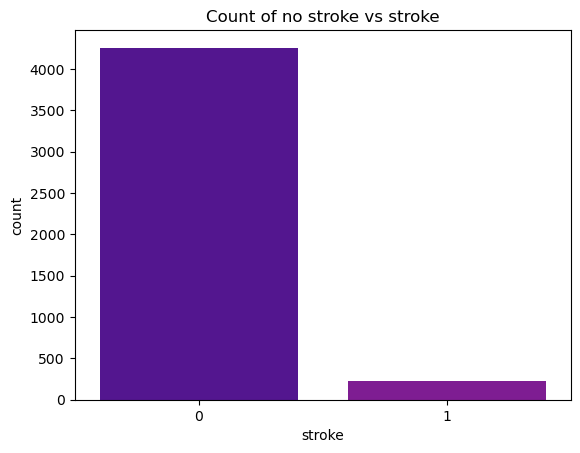

In [3]:
sns.countplot(df.stroke)
plt.title('Count of no stroke vs stroke')
plt.show()


From the count plot above we can see that when strokes are no strokes, there are alot more data points than when there are stroke. Therefore balancing techniques are required, in order for machine algorithms to learn the trends and behaviours for when there are strokes. There are a number of balancing techniques including[(Brownlee, Tour of Data Sampling Methods for Imbalanced Classification, 2020)](https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/):
- Oversampling techniques:
    - Random oversampling - instances from the minority class are randomly chosen, replaced, and added to the training dataset.
    - SMOTE :
        1. A random sample from the minority group is chosen
        2. k-nearest neighbour algorithm is ran so the shortest distance from the data point is chosen
        3. This data is multiplied in the dataset to create additional data for the minority class.
- Undersampling techniques:
    - Random undersampling - Randomly selects examples from the majority class and deletes them from the training dataset.
    - Near miss Algorithm - This approach attempts to balance the distribution by removing the datapoint from the larger class    when two points in the distribution that belong to separate classes are quite close to one another. 
    - Thomek Links:
        1. Find the closest neighbour in the majority class for each sample in the minority class.
        2. Check to see if each pair of closest neighbours discovered in step 1 is a member of a distinct class. Then they create a Tomek Link.
        3. Each Tomek Link should have the majority class sample removed.<br>
        
        
        
Depending on different models, different sampling techniques work better. This will be discussed in futher detail during the report.

<hr style="border:2px solid">

## Notes
<hr style="border-top:1px dashed">

The F1 score was the main emphasis when comparing various model parameters because the data is unbalanced, and while methods are utilised to try and balance the data, they cannot replace actual data.
The default F1 score should be as high as it can be to ensure that an individual is not misdiagnosed with not having a stroke, given that they were having a stroke. This can lead to catestrophic events, even including death. However, the stroke score shouldn't be too low because if an individual was not having a stroke and the algorithm diagnosed it as having a stroke, this could lead to many unnecessary test, which cost alot of money so in tern would lead to a massive financial loss for many hospitals.<br>

The methodology of how different alorithms work comes from ([Wolff, n.d.](https://monkeylearn.com/blog/classification-algorithms/)).

<hr style="border:2px solid">

## Exploratory data analysis 
<hr style="border-top:1px dashed">

In [4]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,46.0,0,0,Yes,Private,Urban,78.79,42.4,smokes,0
1,Female,65.0,0,0,Yes,Self-employed,Urban,248.24,27.0,smokes,0
2,Male,70.0,1,0,Yes,Self-employed,Rural,118.81,26.0,smokes,0


In [5]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no nulls in the data set, therefore no manipulation is required.

In [6]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
print('There is', str(round(100*len(df[df['stroke']==0])/len(df), 0))+str('%'), 'data for no strokes and only', 
      str(round(100*len(df[df['stroke']==1])/len(df), 0))+str('%'), 'for strokes')

There is 95.0% data for no strokes and only 5.0% for strokes


There is a considerable disparity in the amount of data available for stroke and non-stroke cases, with significantly more data available for the latter. Consequently, caution is required when handling outliers and removing data, as the removal of too many data points from stroke cases could result in a loss of critical information.

<hr style="border:2px solid">

## Looking into categorical areas that may effect strokes
<hr style="border-top:1px dashed">

In [8]:
def plot_categorical_strokes(df):
    """
    Summary
    -------
    Takes input df(dataframe) then outputs multiple count plots corresponding to object type columns.
    """
    n_rows = int((len(df.select_dtypes(include=['object']).columns)+1)/2)
    fig, axs = plt.subplots(nrows=n_rows , ncols=2, figsize=(8,8))

    for i, col in enumerate(df.select_dtypes(include=['object']).columns):
        ax = axs[i//2, i%2]
        sns.countplot(x='stroke', hue=col, data=df, ax=ax)
        ax.set_title(f'Count Plot of stroke by {col.capitalize()}')
        ax.legend(title=col, loc='upper right')
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', labelrotation=0)
        
    if n_rows%2 == 1:
        axs[len(df.select_dtypes(include=['object']).columns)//2, 1].remove()
    plt.tight_layout()
    plt.show()


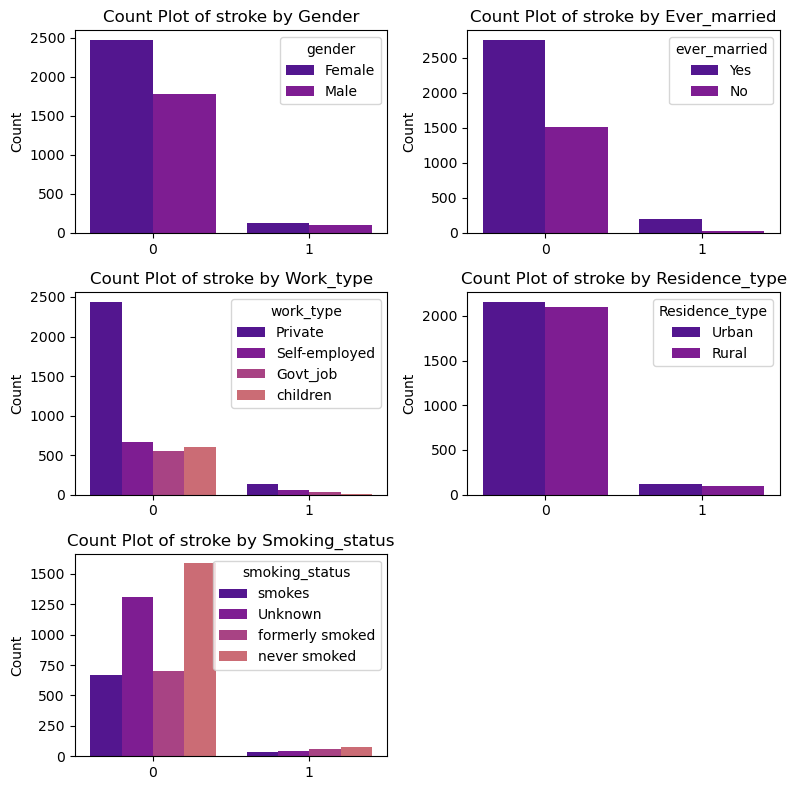

In [9]:
plot_categorical_strokes(df)

The presented plots illustrate the correlation between categorical variables and the incidence of stroke. These visualisations play a crucial role in identifying significant dissimilarities in variable distribution between individuals who experienced a stroke and those who did not. If the distribution of a variable, such as residence type, is found to be similar for both urban and rural populations with regards to stroke occurrence, then it may not contribute additional information to the model. However, for other categorical variables, such as gender, hypertension, and heart disease, distinct dissimilarities in their distribution can be observed between those who suffered from a stroke and those who did not. By identifying such dissimilarities, we can select the most relevant variables for the model and improve its predictive accuracy.

Most of the presented plots exhibit noticeable variations in the distribution of stroke and non-stroke cases, except for the residence type variable. Consequently, the training data section will include two comparisons: one with the exclusion of residence type and one with its inclusion, to evaluate the impact of this variable on different performance metrics such as accuracy and F1 score. The purpose of these comparisons is to determine whether the inclusion or exclusion of residence type affects the model's predictive capabilities and identify the optimal configuration of variables for the model.

<hr style="border:2px solid">

## Looking into numerical data that may effect strokes
<hr style="border-top:1px dashed">

### Continuous Data

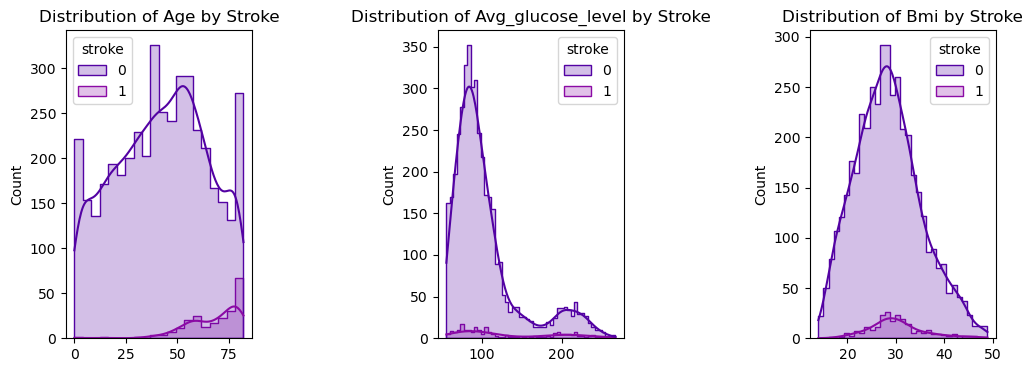

In [10]:
#selecting numerical data types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#empty list to append the columns of numerical types, given number of unique variables more than 1
columns = []
for col in numerical_cols:
    if col!='stroke' and len(df[col].unique()) > 2:
        columns.append(col)

#plotting distribution of data
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, col in enumerate(df[columns]):
    ax = axs[i]
    sns.histplot(x=col, data=df, hue='stroke', element='step', kde=True, ax=ax)
    ax.set_title(f'Distribution of {col.capitalize()} by Stroke')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelrotation=0)
fig.subplots_adjust(wspace=1)
plt.show()

The following plots show the distribution of numerical data in relation to stroke occurrence. Numerical data refers to continuous data points with at least two unique values.

#### Age
The plots reveal that the age distribution for individuals with no strokes is considerably different from that of those with strokes. The majority of people with no strokes are between 25 to 50 years old, while those with strokes tend to be in the 60 to 80 age range. This distinction can aid the model in distinguishing between data points that belong to either group. Additionally, this information is valuable in identifying outliers that may belong to another group.

#### Average Glucose Level
The distribution of average glucose level for both strokes and no strokes are relatively similar. However, there are more data points concentrated around 100 in the no stroke group, while the transition is smoother in the stroke group. This suggests that this variable can still be useful in distinguishing between strokes and no strokes.

#### BMI
The distribution of BMI between strokes and no strokes is almost identical. The average BMI tends to be around 30 in both groups. To determine whether this variable is necessary in the training section, the analysis will include a comparison between the results when this variable is dropped and when it is not.

### Discrete Data


The remaining two columns that require investigation are hypertension and heart disease. These variables are binary and only take on values of 0 or 1. Therefore, instead of using a distribution plot, a count plot would be more appropriate to display the distribution of these variables.

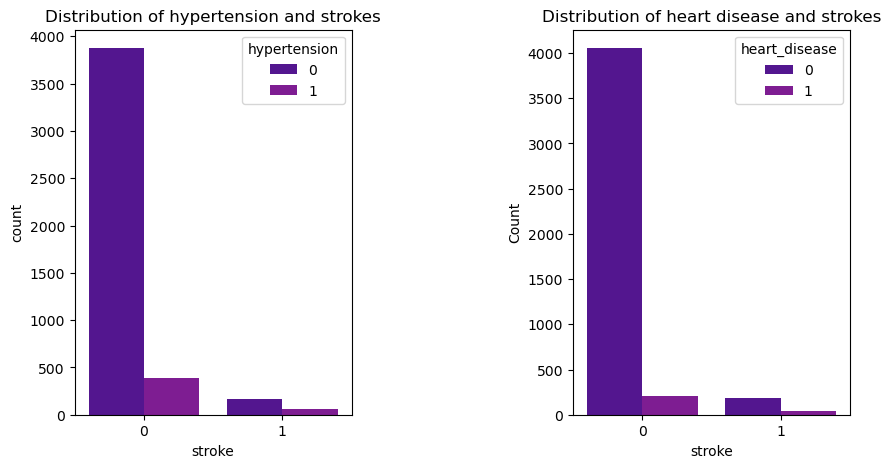

In [11]:
#plotting count plot of discrete data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x='stroke', hue='hypertension', data=df, ax = ax1)
ax1.set_title(f'Distribution of hypertension and strokes')
ax2.set_ylabel('Count')

sns.countplot(x='stroke', hue='heart_disease', data=df, ax = ax2)
ax2.set_title(f'Distribution of heart disease and strokes')
ax2.set_ylabel('Count')
fig.subplots_adjust(wspace=0.8)

In [12]:
no_hype = str(round(100*df[df['stroke']==0].value_counts('hypertension')/len(df[df['stroke']==0]), 1)[0])
hype = str(round(100*df[df['stroke']==0].value_counts('hypertension')/len(df[df['stroke']==0]), 1)[1])
print('The percentage of those without hyper tension in no strokes is', no_hype + str('%'), 'and hypertension is', hype + str('%'))
no_hype_1 = str(round(100*df[df['stroke']==1].value_counts('hypertension')/len(df[df['stroke']==1]), 1)[0])
hype_1 = str(round(100*df[df['stroke']==1].value_counts('hypertension')/len(df[df['stroke']==1]), 1)[1])
print('The percentage of those without hyper tension in strokes is', no_hype_1 + str('%'), 'and hypertension is', hype_1 + str('%'))

The percentage of those without hyper tension in no strokes is 91.0% and hypertension is 9.0%
The percentage of those without hyper tension in strokes is 74.0% and hypertension is 26.0%


In [13]:
no_heart = str(round(100*df[df['stroke']==0].value_counts('heart_disease')/len(df[df['stroke']==0]), 1)[0])
heart = str(round(100*df[df['stroke']==0].value_counts('heart_disease')/len(df[df['stroke']==0]), 1)[1])
print('The percentage of those without heart disease in no strokes is', no_heart + str('%'), 'and heart disease is', heart + str('%'))
no_heart_1 = str(round(100*df[df['stroke']==1].value_counts('heart_disease')/len(df[df['stroke']==1]), 1)[0])
heart_1 = str(round(100*df[df['stroke']==1].value_counts('heart_disease')/len(df[df['stroke']==1]), 1)[1])
print('The percentage of those without heart disease in strokes is', no_heart_1 + str('%'), 'and heart disease is', heart_1 + str('%'))

The percentage of those without heart disease in no strokes is 95.2% and heart disease is 4.8%
The percentage of those without heart disease in strokes is 81.6% and heart disease is 18.4%


From hypertension we see that those with no hypertension tend to vastly more values than those with hyper tension where they did not have strokes in comparison to the distribution between where there are strokes. This could be vital information to ensure that the algorithm learns at a consistent rate. The same effect is shown with heart disease so both of these tend to be competing factors. 

### Dealing with Outliers

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000
mean,43.446693,0.098394,0.054663,105.761430,28.466064,0.049755
std,22.592327,0.297879,0.227347,44.943627,6.764658,0.217462
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,26.000000,0.000000,0.000000,77.192500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.637500,32.575000,0.000000
max,82.000000,1.000000,1.000000,267.760000,48.900000,1.000000


From the descriptive statistics table, it can be observed that age, average glucose level and BMI have relatively high standard deviations. The minimum age value of 0.08 seems unusual as age is typically calculated as a number, however the maximum value appears to be within a reasonable range. For average glucose level, there appears to be a notable difference between the mean and 50% value, indicating a potential area of concern. In contrast, while the standard deviation of BMI is high, the maximum value is not out of the ordinary according to [(Lang, 2023)](https://en.wikipedia.org/wiki/Jon_Brower_Minnoch#:~:text=At%20the%20time%20of%20his,Body%20Mass%20Index%20of%20105.3.). Moreover, the mean value is close to the 50% range and other metrics such as median and minimum are relatively low, therefore further investigation of BMI may not be necessary.

To handle outliers, the distribution of age and glucose level needs to be evaluated. This can be done by using QQ plots to check if the data is distributed normally. As per [(Caquilpan, 2021)](https://www.kaggle.com/general/218717), if the data points are normally distributed, then a common approach is to remove data points that are three times the standard deviation away from the mean. If they are not normally distributed then IQR method is the best approach.

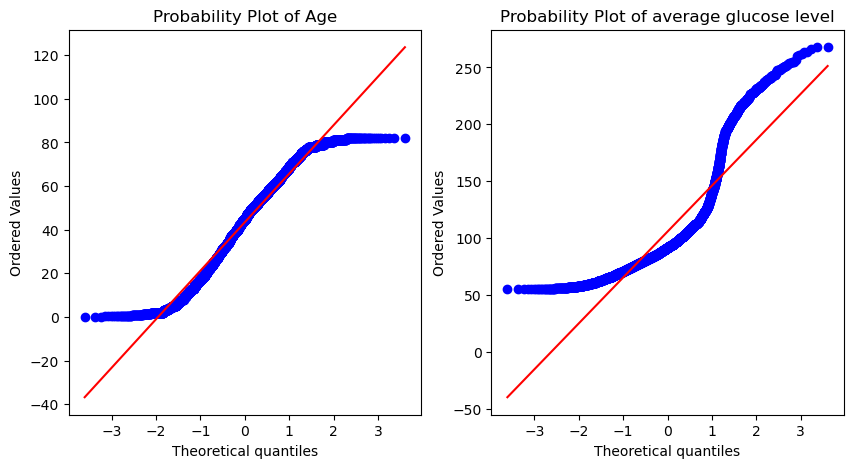

In [15]:
#plotting probability plot to see if data is normalized
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) # creating a subplot with two axes

# Plot 1 - Histogram of age
stats.probplot(df['age'], dist="norm", plot=ax1)
ax1.set_title('Probability Plot of Age')

# Plot 2 - Probability plot of age
stats.probplot(df['avg_glucose_level'], dist="norm", plot=ax2)
ax2.set_title('Probability Plot of average glucose level')

plt.show()


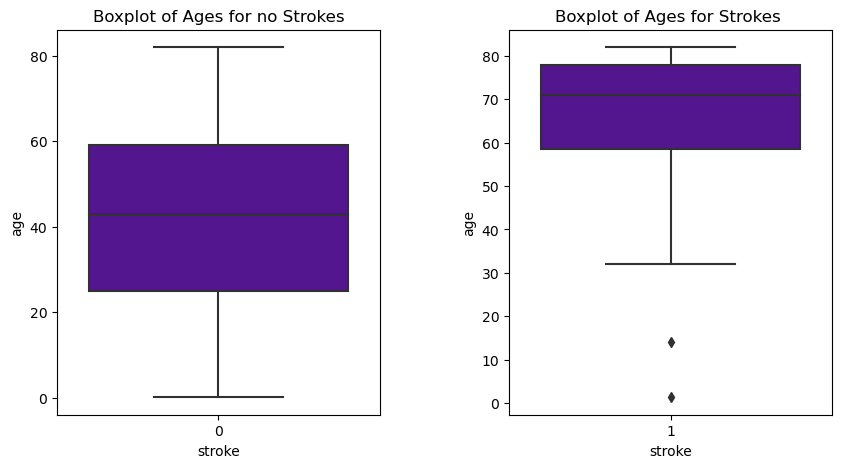

In [16]:
# create a figure with two subplots, one for each value of 'strokes'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot the boxplot of ages for strokes = 0
sns.boxplot(x='stroke', y='age', data=df[df['stroke']==0], ax=axes[0]).set(title = "Boxplot of Ages for no Strokes")

# plot the boxplot of ages for strokes = 1
sns.boxplot(x='stroke', y='age', data=df[df['stroke']==1], ax=axes[1])
axes[1].set_title('Boxplot of Ages for Strokes ')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# show the plot
plt.show()


In the previous section, it was observed that there are slight differences in the distribution between strokes and no strokes. For the no strokes group, there were no outliers detected. However, for the strokes group, two outliers were identified. Since the number of outliers is small, they can be disregarded as they are not likely to significantly affect the results. Therefore the only thing that will be changed is trandorming the age into integers as an age 0.8 does not make any sense.

In [17]:
df['age']=df['age'].astype('int')

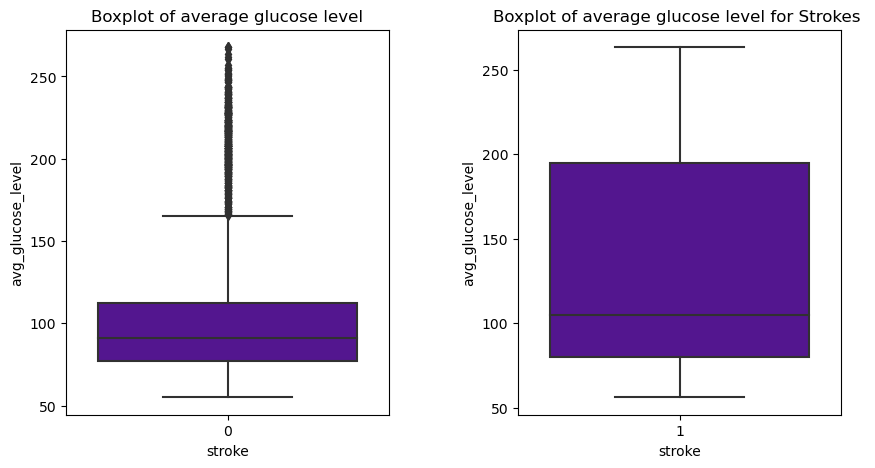

In [18]:
# create a figure with two subplots, one for each value of 'strokes'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot the boxplot of ages for strokes = 0
sns.boxplot(x='stroke', y='avg_glucose_level', data=df[df['stroke']==0], ax=axes[0]).set(title = "Boxplot of average glucose level")

# plot the boxplot of ages for strokes = 1
sns.boxplot(x='stroke', y='avg_glucose_level', data=df[df['stroke']==1], ax=axes[1])
axes[1].set_title('Boxplot of average glucose level for Strokes ')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# show the plot
plt.show()

From the boxplots above, it is evident that there are a significant number of outliers for average glucose level in the "no stroke" category. Since the data is not distributed normally, the IQR method will be used to remove outliers.

In [19]:
# Define function to find outliers using IQR method
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

# Find outliers for avg_glucose_level when stroke == 0
outliers = find_outliers_IQR(df[df['stroke'] == 0]['avg_glucose_level'])

# Print information about outliers and replace them with mean
print('Number of outliers:', len(outliers))
print('Max outlier value:', outliers.max())
print('Min outlier value:', outliers.min())
print('Percentage of outliers where stroke = 0:', round(100 * len(outliers) / len(df[df['stroke'] == 0]), 1), '%')
print('Percentage of outliers in whole dataframe:', round(100 * len(outliers) / len(df), 1), '%')

# replacing outliers by mean of no strokes in dataframe
df.replace(outliers, np.mean(df[df['stroke'] == 0]['avg_glucose_level']), inplace=True)


Number of outliers: 473
Max outlier value: 267.76
Min outlier value: 165.99
Percentage of outliers where stroke = 0: 11.1 %
Percentage of outliers in whole dataframe: 10.6 %


Since all of the outliers lie where there are no strokes, they can be removed, as there is a lot more data available for the machine model to learn from. The mean value will be used to replace these outliers.

<hr style="border:2px solid">

## Pre-processing 
<hr style="border-top:1px dashed">

In this section, the discrete numerical columns and the categorical variables will be one-hot encoded, as there are more than 2 unique variables for the categorical items. In this scenario one hot encoded will be best.

In [20]:
df.nunique()

gender                  2
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3580
bmi                   338
smoking_status          4
stroke                  2
dtype: int64

In [21]:
def one_hot_encode(df, columns):
    # get the list of categorical columns
    cat_cols = columns
    # one hot encode the categorical columns
    df= pd.get_dummies(df, columns=cat_cols)

    return df

In [22]:
df = one_hot_encode(df, ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

<hr style="border:2px solid">

## EDA - 2
<hr style="border-top:1px dashed">

In [23]:
df.describe()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,...,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000,4482.000000
mean,43.435520,105.761430,28.466064,0.049755,0.580098,0.419902,0.901606,0.098394,0.945337,0.054663,...,0.131191,0.573628,0.160866,0.134315,0.490852,0.509148,0.301651,0.169344,0.371486,0.157519
std,22.613348,44.943627,6.764658,0.217462,0.493598,0.493598,0.297879,0.297879,0.227347,0.227347,...,0.337647,0.494604,0.367448,0.341029,0.499972,0.499972,0.459026,0.375097,0.483256,0.364330
min,0.000000,55.120000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,77.192500,23.600000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,91.680000,28.100000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,113.637500,32.575000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,267.760000,48.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<hr style="border:2px solid">

## Training
<hr style="border-top:1px dashed">

A test size of 30% is often used as a general rule of thumb for splitting a dataset into a training and testing set when developing a machine learning algorithm. This is because it strikes a good balance between having enough data for training and having enough data for testing the model's performance[(Bronshtein, 2017)](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6).

With a larger test size, say 50%, you may have less data for training the model, which can lead to poorer performance. On the other hand, with a smaller test size, say 10%, you may not have enough data for testing the model's performance, which can lead to overfitting and poor generalization to new data.

In [24]:
def sampling_methods(scaler, method, test_siz = 0.3,  model = 'None', X = df_scenario1.drop(columns = ['stroke']), y = df_scenario1['stroke']):
    """
    Summary of function
    -------------------
    This function takes the balancing technique and scaler and model as well as features used 
    to output of testing, training, predictions and calculating cross validation score
    
    Parameters
    ----------
    method : the sampling technique, chosen from under, smote, over, Near miss Algorithms, Thomek Links and None
    scaler : this is the scaling of the data, chosen from minmax, standard or none
    test_size : Test size of data, default is 0.3
    model: modeling technique, can choose from None, KNN, Decision tree, SVC and Random Forest, default = 'None'
    X: feauture selection deafault is all features
    y: target variable

    Returns
    -------
    This returns the training and testin data, namely X_test, X_train, y_test, y_train as well as predictions, 
    depnding on modelling tehnique used and cross validation score which uses f1 score.
    """
        
    if scaler == 'standard':
        scaler_obj = StandardScaler()
        X_train = scaler_obj.fit_transform(X_train)
        X_test = scaler_obj.transform(X_test)
    elif scaler == 'minmax':
        scaler_obj = MinMaxScaler()
        X_train = scaler_obj.fit_transform(X_train)
        X_test = scaler_obj.transform(X_test)
    elif scaler == 'None':
        scaler_obj = None
        X_train, X_test = X_train, X_test
    else:
        raise Exception(f"{scaler} is invalid, please pick from standard, minmax or None")
        
    sampling_methods = {
        'under': RandomUnderSampler(sampling_strategy='not minority', random_state =1),
        'smote': SMOTE(random_state = 1),
        'over': RandomOverSampler(sampling_strategy='minority', random_state =1 ),
        'Near miss Algorithms': NearMiss(),
        'Tomek Links': TomekLinks()
    }
    
    if method in sampling_methods: 
        sampler = sampling_methods[method]
        X_train, y_train = sampler.fit_resample(X_train, y_train)
    elif method == 'None':
        X_train, y_train = X_train, y_train
    else:
        raise Exception(f"sampling method {method} is invalid, please pick from under, over or None, smote, near miss algorithm and Tomek Links")
    
    if model == 'KNN':
        modler = KNeighborsClassifier(n_neighbors=13)
        modler.fit(X_train,y_train)
        y_pred = modler.predict(X_test)
    elif model == 'Decision tree':
        modler = DecisionTreeClassifier(random_state=1)
        modler.fit(X_train,y_train)
        y_pred = modler.predict(X_test)
    elif model == 'SVC':
        modler = SVC(kernel = 'linear')
        modler.fit(X_train,y_train)
        y_pred = modler.predict(X_test)
    elif model == 'Random Forest':
        modler = RandomForestClassifier(n_jobs = 2, random_state = 1)
        modler.fit(X_train,y_train)
        y_pred = modler.predict(X_test)
    elif model == 'None':
        modler = None
        y_pred = y_test
        
    else:
        raise Exception(f"{model} is invalid, please pick from KNN, Decision tree, SVM or Random Forest") 
        
    if modler is not None:
        cv_scores = cross_val_score(modler, X_train, y_train, cv=5, scoring = 'f1')
        mean_cv_score = cv_scores.mean()
    else:
        mean_cv_score = None
        
    return X_train, X_test, y_train, y_test, scaler_obj, modler, y_pred, mean_cv_score


NameError: name 'df_scenario1' is not defined

In [ ]:
X_train, X_test, y_train, y_test, scaler_obj, modler, y_pred, mean_cv_score = sampling_methods('None', 'None', model = 'Decision tree')

In [ ]:
from sklearn.metrics import f1_score
def model_eval(model):
    """
    Summary of function
    -------------------
    This function takes the modeling technique and outputs the f1 score corresponding to different techniques used
    from sampling_methods
    
    Returns
    -------
    This returns 3 data frames, df1 is f1 score for class1, df2 is f1 score for class 2, error is the error rate and 
    lastly the predictions.
    """
    
    methods = ['None', 'under', 'over', 'smote', 'Near miss Algorithms', 'Tomek Links']
    scalers = ['None', 'standard', 'minmax']

    # Train and evaluate a logistic regression model for each combination of sampler and scaler
    f1_score1 = {method: {} for method in methods}
    f1_score2 = {method: {} for method in methods}
    error_rate = {method: {} for method in methods}

    for scaler in scalers:
        for method in methods:
            try:
                X_train, X_test, y_train, y_test, scaler_obj, modler, y_pred, mean_cv_score = sampling_methods(scaler, method)
                clf = model
                clf.fit(X_train, y_train)

                # Make predictions on the testing set and compute the f1 scores
                y_pred = clf.predict(X_test)
                f1_scores = f1_score(y_test, y_pred, average=None)

                # Store the f1 scores in the dictionary
                f1_score1[method][scaler] = f1_scores[0]
                f1_score2[method][scaler] = f1_scores[-1]
                error_rate[method][scaler] = np.mean(y_pred != y_test)
            except ValueError:
                print(f"Error occurred for scaler: {scaler}, method: {method}")

    # Convert the f1_score dictionaries into Pandas DataFrames
    df1 = pd.DataFrame.from_dict(f1_score1)
    df1.index.name = 'Scaler'
    df1.columns.name = 'Method'
    df2 = pd.DataFrame.from_dict(f1_score2)
    df2.index.name = 'Scaler'
    df2.columns.name = 'Method'
    error = pd.DataFrame.from_dict(error_rate)
    error.index.name = 'Scaler'
    error.columns.name = 'Method'
    return df1, df2, error, y_pred

In [ ]:
def f1_score_plots(df1, df2, xticks_df1=[0, 0.2, 0.4, 0.6, 0.8, 1], xticks_df2=[0, 0.1, 0.20, 0.30, 0.4, 0.5]):
    """
    Summary of function
    -------------------
    This function takes two data frames coming from model_eval and outputs plots of the f1 score
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    df1.plot(kind='barh', ax=ax1, legend = False)
    ax1.set_title('F1 scores for no stroke')
    ax1.set_xticks(xticks_df1)
    
    df2.plot(kind='barh', ax=ax2, legend = False)
    ax2.set_title('F1 scores for stroke')
    ax2.set_xticks(xticks_df2)

    fig.legend(handles=ax1.containers, labels=df1.columns.tolist(), loc='lower center', ncol=len(df1.columns))

    for c1, c2 in zip(ax1.containers, ax2.containers):
        ax1.bar_label(c1, labels=[round(v, 2) for v in c1.datavalues], label_type='edge', fontsize=8)
        ax2.bar_label(c2, labels=[round(v, 2) for v in c2.datavalues], label_type='edge', fontsize=8)

    fig.tight_layout()
    plt.show()


<hr style="border:2px solid">

## K-nearest-neighbour(KNN)
<hr style="border-top:1px dashed">

<ins>How does it work? </ins><br>
KNN is a non-parametric model that makes predictions based on the proximity of new data points to existing data points. It calculates the distance between new data points and all existing data points in the training dataset, and then classifies the new data point based on the majority class of its K nearest neighbors.

To begin the evaluation process by initially avoiding any type of scaler or sampling method. Once the optimal number of KNN has been confirmed, the report suggests choosing the most appropriate scaling and sampling method. This approach ensures that the effectiveness of the KNN method can be effectively assessed before implementing additional measures to improve its performance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')
error_rate = []
# plotting the error rate when no sampling method is used 
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test, *_ = sampling_methods('None', 'None')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
#plots the error rate
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

The KNN algorithm is a non-parametric and lazy learning algorithm that classifies data based on the k nearest neighbors. The optimal value for k is usually determined through experimentation, with odd values often chosen to avoid ties. The reason for this is that when using an even value of k, it may be possible to end up with a tie between the two nearest neighbors. Choosing an odd k eliminates this possibility.

In the current analysis, KNN was used as a classification algorithm with 13 neighbors. The selection of k=13 was based on experimentation, and it was found to be the optimal value as the error rate reaches an asymptote. Therefore, the KNN algorithm with k=13 was chosen for the analysis.

In [ ]:
df1, df2, error_1 , y_pred= model_eval(KNeighborsClassifier(n_neighbors=13))

In [ ]:
f1_score_plots(df1.drop(['None'], axis =0), df2.drop(['None'], axis =0), xticks_df1=[0, 0.2, 0.4, 0.6, 0.8, 1], xticks_df2=[0, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24])

Upon analyzing the two tables presented above, it is evident that the F1 score for strokes is significantly lower in comparison to that of no strokes. It is crucial to select a sampling and scaling technique that has the highest F1 score for strokes, as it is a more critical metric. This is particularly important because if an individual has suffered a stroke, it should not be misdiagnosed as no stroke, as this could lead to the patient being untreated and potentially fatal. The highest score is observed when under sampling is employed, along with the use of a standard scaler. However, despite being the highest score in the table, it remains remarkably low, with only an 18% F1 score.

<ins>Why does undersampling and standard scaler work the best for unbalanced data in KNN?</ins><br>
Firstly, undersampling addresses the issue of class imbalance, where there is a significantly larger number of observations in one class than the other. This can result in the KNN algorithm being biased towards the majority class, leading to a high number of false negatives (misclassification of the minority class). By undersampling the majority class, the imbalance is reduced, allowing the algorithm to better identify the minority class.

Secondly, standard scaler addresses the issue of feature scaling. In KNN, the distance between two data points is a critical factor in determining which class a new observation belongs to. If the features are on different scales, then the distance metric used by KNN will be biased towards features with larger scales, leading to an inaccurate classification. By scaling the features, the distance metric is applied evenly across all features, allowing KNN to better identify which class a new observation belongs to.

#### comparison with feauture selection

As discussed in the sections above, BMI and Residence type is dropped for feauture selection in order to analyse the performance and compare it to when all feautures are selected.

In [ ]:
*_, y_pred_feau, mean_cv_score = sampling_methods(method = 'under', scaler ='standard', 
X = df.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                  y = df['stroke'], model = 'KNN')

In [ ]:
cm_fea = confusion_matrix(y_test, y_pred_feau)
print(f'f1 score for feauture selection for no strokes is {f1_score(y_test, y_pred_feau, average=None)[0]}')
print(f'f1 score for feauture selection for strokes is {f1_score(y_test, y_pred_feau, average=None)[-1]}')

In [ ]:
*_, y_pred, mean_cv_score = sampling_methods(method = 'under', scaler = 'standard', model = 'KNN')
print(f'f1 score for no feauture selection for no strokes is {f1_score(y_test, y_pred, average=None)[0]}')
print(f'f1 score for no feauture selection for strokes is {f1_score(y_test, y_pred, average=None)[-1]}')

When comparing the f1 scores for feature selection and all features, it becomes apparent that feature selection performs better in terms of identifying the "no stroke" class. However, it slightly underperforms when it comes to the f1 score for the "stroke" class. Nevertheless, the difference between the f1 scores for both classes is not significant, with the gap being less than 1%. To determine which approach performs better overall, a confusion matrix is presented.

In [ ]:
# Create figure with subplots
def confusion_matrix_(y_pred_feau, y_pred):
    """
    Summary
    -------
    Takes in two arguments, one for feauture selection and one for no fature selection and outputs confusion matrix
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # Plot confusion matrix on each subplot
    disp_1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_feau), display_labels=['No stroke', 'stroke'])
    disp_1.plot(ax=axes[0])
    axes[0].set_title('Confusion Matrix with feauture selection')
    disp_2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=['No stroke', 'stroke'])
    disp_2.plot(ax=axes[1])
    axes[1].set_title('Confusion Matrix with all feautures')
    plt.tight_layout()
    plt.show()

In [ ]:
confusion_matrix_(y_pred_feau, y_pred)

From the presented confusion matrix, it is evident that by opting for feature selection, the success rate for correctly identifying the "no stroke" class is lower when compared to using all the features. However, even with feature selection, the success rate for identifying "no stroke" is quite high, standing at 70% accuracy. On the other hand, using all the features results in a success rate of 72% for the "no stroke" class. This difference is not significant and hence, does not warrant a decisive selection between the two methods.

Regarding the "stroke" class, feature selection outperforms using all the features, with success rates of 47% and 41%, respectively. Given that the success rate for identifying "stroke" is more crucial for the task at hand, the slightly better performance of feature selection for this class leads to its selection as the chosen method.

<hr style="border:2px solid">

## Decision tree


<hr style="border-top:1px dashed">

<ins>How does it work?</ins><br>
A decision tree uses a tree structure to develop classification or regression models. It incrementally develops an associated decision tree while segmenting a dataset into smaller and smaller sections. The outcome is a tree containing leaf nodes and decision nodes.

In [ ]:
df1, df2, error_1 , y_pred= model_eval(DecisionTreeClassifier(random_state=1))

In [ ]:
f1_score_plots(df1, df2, xticks_df2 = [0, 0.02, 0.04, 0.06, 0.08,0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22])

The optimal results were observed when applying Tomek Links and standard scaler techniques, with an F1-score of 19% for strokes and a corresponding standard of 95%.

<ins>Why does Thomek Links sampling technique and standard scaler work the best for unbalanced data in Decision trees?</ins><br>
Tomek Links sampling technique is useful for dealing with imbalanced datasets by removing some of the majority class samples that are closest to minority class samples. This can help the decision tree algorithm to better distinguish between the minority and majority classes. Additionally, standard scaler is used to normalize the feature values to a similar range, preventing certain features from dominating the model.

When using decision trees, Tomek Links and standard scaler can work well together because they can help to reduce bias towards the majority class and produce a more balanced decision tree. By removing some of the majority class samples that are closest to the minority class, the decision tree algorithm can better distinguish between the two classes and give more weight to the minority class samples. Additionally, standard scaler can ensure that each feature is weighted equally in the decision-making process, reducing the impact of any particular feature on the model.

#### Comparison of feauture selection vs no feauture selection. 

In [ ]:
*_, y_pred_feau, x = sampling_methods(scaler='standard', method ='Tomek Links' , model = 'Decision tree',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'])

In [ ]:
print(f'f1 score for feauture selection for no strokes is {f1_score(y_test, y_pred_feau, average=None)[0]}')
print(f'f1 score for feauture selection for strokes is {f1_score(y_test, y_pred_feau, average=None)[-1]}')

In [ ]:
*_, y_pred, x = sampling_methods(method = 'Tomek Links', scaler = 'standard', model = 'Decision tree')
print(f'f1 score for no feauture selection for no strokes is {f1_score(y_test, y_pred, average=None)[0]}')
print(f'f1 score for no feauture selection for strokes is {f1_score(y_test, y_pred, average=None)[-1]}')

The F1 score for feauture selection is slghtly better for descision trees with around 0.01 difference. In order to examine the proportions of which model performed better, the confusion matrix for feature selection and no feauture selection is plotted.

In [ ]:
confusion_matrix_(y_pred_feau, y_pred)

From the confusion matrix, it is evident that for no stroke the confuion matrix for all the feautures tend to have more correct out comes with an accuracy of 94%, whilst for feauture selection it has an an accuracy of 93%. There only tends to be a 1% difference in terms of strokes. Since there are a lot less data points for the stroke data a little increase in correct data distinction leads to a higher percentage. The accuracy for no feature selection when there is a stroke is 23% and for feature selection it is 28% which is quite the improvement. Therefore feature selection will be chosen instead. 

<hr style="border:2px solid">


## Random Forest
<hr style="border-top:1px dashed">

<ins>How do they work?</ins><br>
Random forest is a type of supervised learning. It uses the concept of bagging. In bagging a group of models is trained on different subsets of the data. These subsets are ran through decsion tree algorithm and the final output is generated by collating all the different outputs of all the different models

In [ ]:
df1, df2, error_1 , y_pred= model_eval(RandomForestClassifier(n_jobs = 2, random_state = 1))

In [ ]:
f1_score_plots(df1, df2, xticks_df2 = [0, 0.03, 0.06, 0.09, 0.12,0.15, 0.18, 0.21, 0.24])#, loc_df1 =(0, 0.84), loc_df2 = (0,0.84))

Random Forest is a tree-based ensemble learning method that is relatively robust to differences in feature scales, unlike some other machine learning models such as Support Vector Machines or k-Nearest Neighbors. Random Forest makes decisions based on thresholds that compare individual features to a fixed value, rather than on the absolute values of the features. As a result, feature scaling may not have a significant impact on the performance of a Random Forest model. Therefore as all the under sampling methods scored the same in terms of F1 score for stroke, the result will be to use undersampling method with no scaler as this merely increases computation time.  

In [ ]:
*_, y_pred_feau, x = sampling_methods(scaler='None', method ='under' , model = 'Random Forest',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'])

In [ ]:
print(f'f1 score for feauture selection for no strokes is {f1_score(y_test, y_pred_feau, average=None)[0]}')
print(f'f1 score for feauture selection for strokes is {f1_score(y_test, y_pred_feau, average=None)[-1]}')

In [ ]:
*_, y_pred, x = sampling_methods(method = 'under', scaler = 'None', model = 'Random Forest')
print(f'f1 score for no feauture selection for no strokes is {f1_score(y_test, y_pred, average=None)[0]}')
print(f'f1 score for no feauture selection for strokes is {f1_score(y_test, y_pred, average=None)[-1]}')

The F1 score for both feature selection and no feature selection scored slightly higher for both no strokes and strokes. The confusion matrix of both situations will be plotted comparing the amount of right answers for each situation.

In [ ]:
confusion_matrix_(y_pred_feau, y_pred)

From the confusion matrix plots above, it is evident that feature selection outperformed no feature selection. The accuracy for no strokes was 72% in the feature selection, whilst it was 72.5% for all features so the difference is so small that it may be considered insignificant. Whilst in terms of the stroke data the accuracy for feature selection was 76% and for no feature selection it was 72% so this is quite the improvement for feature selection.

<hr style="border:2px solid">

## Support vector machine Algorithm(SVM)

<hr style="border-top:1px dashed">

<ins>How does it work? </ins><br>
SVM categorises data points even when they are not otherwise linearly separable by mapping the data to a high-dimensional feature space.

In [ ]:
df1, df2, error_1 , y_pred= model_eval(SVC(kernel = 'linear'))

In [ ]:
f1_score_plots(df1, df2, xticks_df2 = [0, 0.03, 0.06, 0.09, 0.12,0.15, 0.18, 0.21, 0.24])

From the plots above it is evident that when under sampling is used and the standard scaler is applied the F1 score for strokes is the highest at 23% and the corresponding strokes is 84%.

<ins>Why does under sampling technique and standard scaler work the best for unbalanced data in SVM model?</ins><br>
The reason why under-sampling technique and standard scaler work well for unbalanced data in Support Vector Machines (SVM) is because these techniques help to address two common problems that arise with imbalanced datasets: class imbalance and feature scaling.

Class imbalance occurs when one class has significantly more data samples than the other class. This can lead to a model that is biased towards the majority class and performs poorly on the minority class. Under-sampling addresses this problem by randomly removing some of the majority class samples, thereby balancing the class distribution and reducing bias.

Feature scaling is important for SVM because it uses the distance between points to find the optimal decision boundary. If the features are not on the same scale, then some features may have a disproportionate effect on the distance calculation, leading to a suboptimal decision boundary. Standard scaler addresses this problem by scaling the features to have zero mean and unit variance, which puts all features on the same scale and ensures that each feature contributes equally to the distance calculation.

Together, these techniques can improve the performance of SVM on imbalanced datasets by reducing bias and ensuring that the features are on the same scale. However, it is worth noting that the best approach for dealing with imbalanced datasets depends on the specific problem and dataset, and other techniques such as oversampling or more advanced resampling methods may be more appropriate in some cases.

#### Comparison of feature selection vs no feature selection

In [ ]:
*_, y_pred_feau,x = sampling_methods(scaler='standard', method ='under' , model = 'SVC',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'])

In [ ]:
*_, y_pred, x = sampling_methods(method = 'under', scaler = 'standard', model = 'SVC')
print(f'f1 score for no feauture selection for no strokes is {f1_score(y_test, y_pred, average=None)[0]}')
print(f'f1 score for no feauture selection for strokes is {f1_score(y_test, y_pred, average=None)[-1]}')

In [ ]:
print(f'f1 score for feauture selection for no strokes is {f1_score(y_test, y_pred_feau, average=None)[0]}')
print(f'f1 score for feauture selection for strokes is {f1_score(y_test, y_pred_feau, average=None)[-1]}')

For the SVM model, the model performs the best on feature selection for both strokes and no strokes. Although again there is no major differnce between them with no more than 1% difference in the scores for strokes and no strokes.

In [ ]:
confusion_matrix_(y_pred_feau, y_pred)

From the confusion matrix above for feature selection and no feature selection the number of correctly identified strokes was the same. However in terms of no strokes data feature selection performed slightly better, with identifying 5 more data points. Therefore overall feature selection did better.

<hr style="border:2px solid">

## Model selection

<hr style="border-top:1px dashed">

This section will be comparing and contrasting the different models and the relevant parameters that we have chosen in previous section. This includes evaluating the different metrics such as F1 score, recall, precision and cross validation  The F1, recall and precision scores will only be for the strokes whilst the cross validation score is based on the overall f1 score, therefore this way the analysis will be focused mainly on trying to predict the strokes data, whilst implementing no strokes data for the cross validation.

In [ ]:
X_train, X_test, y_train, y_test, scaler_obj, modler, y_pred_knn, cross_val_knn = sampling_methods(scaler='standard', method ='under',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'], model = 'KNN')

In [ ]:
X_train, X_test, y_train, y_test, scaler_obj, modler, y_pred_dt, cross_val_dt = sampling_methods(scaler='standard', method ='Tomek Links',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'], model = 'Decision tree')

In [ ]:
X_train, X_test, y_train, y_test, scaler_obj, modler, y_pred_rf, cross_val_rf = sampling_methods(scaler='None', method ='under',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'], model = 'Random Forest')

In [ ]:
X_train, X_test, y_train, y_test, scaler_obj, modler, y_pred_svm, cross_val_svm = sampling_methods(scaler='standard', method ='under',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'], model = 'SVC')

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

#ccreating data frame for corresponding recall, precision, f1 and cross validation scores for different data frames
recall_scores = [recall_score(y_test, y_pred_knn, average=None)[-1], recall_score(y_test, y_pred_rf, average=None)[-1],
                 recall_score(y_test, y_pred_rf, average=None)[-1], recall_score(y_test, y_pred_svm, average=None)[-1]]
precision_scores = [precision_score(y_test, y_pred_knn, average=None)[-1], precision_score(y_test, y_pred_rf, average=None)[-1],
                 precision_score(y_test, y_pred_rf, average=None)[-1], precision_score(y_test, y_pred_svm, average=None)[-1]]
f1_scores = [f1_score(y_test, y_pred_knn, average=None)[-1], f1_score(y_test, y_pred_rf, average=None)[-1],
                 f1_score(y_test, y_pred_rf, average=None)[-1],f1_score(y_test, y_pred_svm, average=None)[-1]]
cross_val = [ cross_val_knn ,cross_val_dt, cross_val_dt, cross_val_svm ]

index = ['KNN - under and standard', 'DT - Thomek Links and None', 'RF - Under and None', 'SVC - standard and None']

data = {'Recall Score': recall_scores, 'Precision Score': precision_scores, 'F1 Score': f1_scores, 'Cross Validation Score': cross_val}

# create a dataframe
df_r = pd.DataFrame(data, index=index)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# plot the metrics
df_r.plot(kind='barh', ax=ax)

# set the axis labels and the title
ax.set_xlabel('Score')
ax.set_ylabel('Classifier - Sampling Technique and Hyperparameters')
ax.set_title('Classifier Performance Metrics')

# add the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# add the data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', labels=[f'{x:.2f}' for x in container.datavalues])

plt.show()

From the plot above it is evident that for SVC that it outperforms all the models in every single metric. The cross validation score is of high importance as the cross validation score is a metric used to evaluate the performance of a machine learning models. It involves dividing the data into subsets, training the model on a subset and testing it on the remaining subset. This process is repeated several times with different subsets, and the average score is taken as the final score. The purpose of cross-validation is to estimate the performance of the model on an independent dataset, and to prevent overfitting by validating the model on different subsets of the data.The cross-validation score gives an estimate of how well the model is expected to perform on new data. From the plots above it is clear that the SVC model would be the best for predicting new data.

Although the cross validation score is high, the precision for the minority class is still quite low at only 13%. The precision score for the minority class tells us how well the model is able to identify the minority class instances correctly out of all instances it predicted as the minority class. Therefore the model is only able to predict 13% of cases where a patient had a stroke. It is still the highest in terms of all the other results. 

On the other hand, the recall score is quite high. Where the recall score is also known as sensitivity or true positive rate, measures the proportion of actual positive samples that are correctly identified by the classifier. A high recall score for the minority class indicates that the classifier is able to identify most of the positive samples from that class, while a low recall score indicates that the classifier is missing many of them. Recall score tends to be more of an appropriate measure and it is at 78% which is quite high. 

Lastly the F1 score tells us how well the classifier is able to balance precision and recall. In other words, it tells us how well the classifier is able to identify true positives (recall) while avoiding false positives (precision). A high F1 score for the minority class means that the classifier is able to accurately identify instances of that class while minimizing false positives. The F1 score is at 23% which is still quite low, therefore grid search will be implemented in order to try and get the F1 score as high as possible.

In [ ]:
X_train, X_test, y_train, y_test,*_= sampling_methods(scaler='standard', method ='under',
X = df_scenario1.drop(columns = ['stroke', 'bmi', 'Residence_type_Rural', 'Residence_type_Urban'], axis = 1),
                                   y = df_scenario1['stroke'])

In [ ]:

# Define the SVM model
svc = SVC()

# Define the grid of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4]}

# Define the scoring function using f1_score with pos_label=None
scoring = make_scorer(f1_score, pos_label=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, scoring=scoring, cv = 5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score for true negatives:", f1_score(y_test, pred, average = None)[-1])


By implementing grid search it is evident that the F1 score for the minority class is not increasing. The only thing has changed when implementing grid search is the value C, where the hyperparmeter C controls the regularization of the model. Specifically, C is the penalty parameter of the error term. A smaller value of C creates a wider margin, allowing more misclassifications of training examples, while a larger value of C creates a smaller margin, forcing the algorithm to correctly classify more training examples. A larger C can lead to overfitting, while a smaller C can lead to underfitting. However since cross validation of 5 is defined it is assumed that C = 10 will not lead to overfitting. 

From this grid search it is clear that the hyperparameters do not have a huge impact on F1 score. This may suggest that dataset is very hard to classify.

#### Limitations of Metrics
<ins>F1 score:</ins><br>
1. Ignores true negatives: F1 score only considers the positive class and ignores the true negatives. This may lead to biased evaluation results, especially in imbalanced datasets.
2. Balance between precision and recall: F1 score is a trade-off between precision and recall, which means that an improvement in one may result in a decrease in the other.<br>

<ins>Precision score:</ins><br>
1. May be misleading: Precision can be misleading in the presence of imbalanced classes. A high precision score for the minority class does not necessarily mean that the classifier is performing well.<br>

<ins>Recall score:</ins><br>
1. May miss true positives: Recall may miss some true positives, especially if the classifier is biased towards the majority class.<br>

<ins>Cross-validation:</ins><br>
1. Increased computation time: Cross-validation can be computationally expensive, especially for large datasets or complex models.
2. Information leakage: Cross-validation may result in information leakage if the same data is used for both training and testing during the cross-validation process. This can result in over-optimistic performance estimates.<br>

It is important to keep these limitations in mind and to carefully choose evaluation metrics and techniques based on the problem at hand.

<hr style="border:2px solid">

## Conclusion and Next Steps
<hr style="border-top:1px dashed">

Throughout the report for every model implementation it was clear that feature selection helped boost the model's performance. However the score's correspomding to each model, even the final model were still quite low. Although grid search was deployed, it did increase the F1 score correspondig to the minority class. <br>

There are many things that can be further implemented or changed to help improving the scores, this includes changing from one-hot encoding to label encoding. Other options would include deploying other modelling techniques such as neural networks or naive bayes modelling techniques.

<hr style="border:2px solid">

## References
<hr style="border-top:1px dashed">

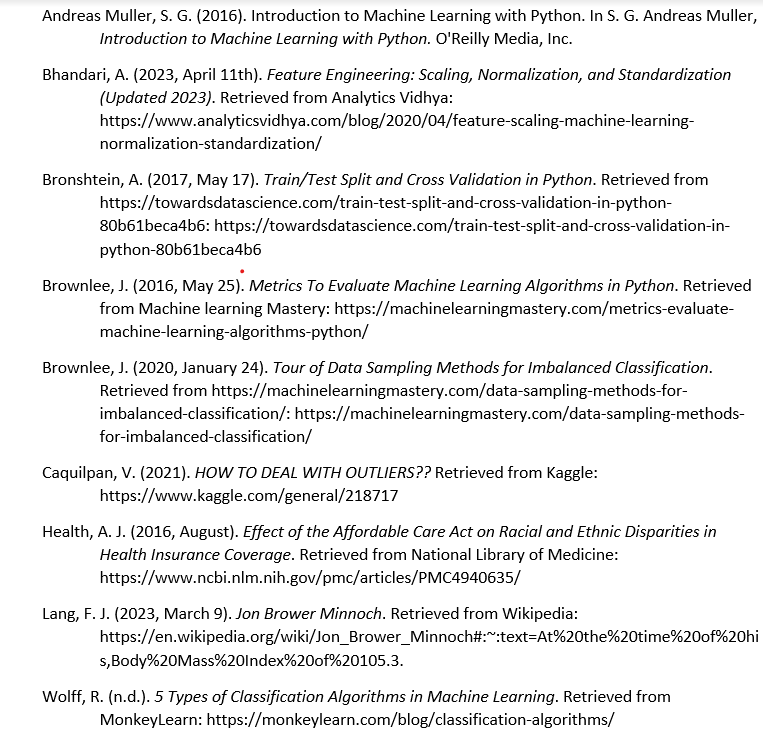


<hr style="border:2px solid">

## Predicting unseen data

<hr style="border-top:1px dashed">

In [ ]:
df_1 = pd.read_csv('brain_stroke_unseen.csv')

In [ ]:
outliers = find_outliers_IQR(df_1['avg_glucose_level'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('There are', str(round(100*len(outliers)/len(df_1),1))+str('%'), 'outliers')

In [ ]:
df_1.replace(outliers, np.mean(df[df['stroke']==0]['avg_glucose_level']), inplace = True)

In [ ]:
df_1.columns

In [ ]:
df_1.drop(['bmi', 'Residence_type'], axis = 1, inplace = True)

In [ ]:
df_1 = one_hot_encode(df_1, ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status'])

In [ ]:
df_1.head()

In [ ]:
new = scaler_obj.transform(df_1)

In [ ]:
predict = grid_search.predict(new)

In [ ]:
final = pd.read_csv('brain_stroke_unseen.csv')
final['Predictions'] = predict
final.head()

In [ ]:
final.to_csv('C:/Users/FroharHkimi/Python sandbox/ML/project/brain_stroke_pred.csv', index=False)